<p  style="font-size:50px;color:red;">Network Intrusion Detection</p>

<p  style="font-size:30px;color:red;">model is  working on cybersecurity</p>

<h1  style="color:red;">Data preprocessing</h1>

<h3>importing libararies</h3>

In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.metrics import confusion_matrix, accuracy_score,  roc_auc_score
from sklearn.preprocessing import StandardScaler
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

<h3>data loading</h3>

In [3]:
data = pd.read_csv("DrDoS_DNS.csv")
data.head(5)

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
0,17,2468,4,0,1580.0,0.0,395.0,0.0,1620.745543,0.0,822.666667,0.0,822.666667,1620.745543,6.401945e+05,DrDoS_DNS
1,17,133,4,0,5888.0,0.0,1472.0,0.0,30075.187970,0.0,44.333333,0.0,44.333333,30075.187970,4.427068e+07,DrDoS_DNS
2,17,33509,200,0,88000.0,0.0,440.0,0.0,5968.545764,0.0,168.386935,0.0,168.386935,5968.545764,2.626160e+06,DrDoS_DNS
3,17,288495,200,0,88000.0,0.0,440.0,0.0,693.252916,0.0,1449.723618,0.0,1449.723618,693.252916,3.050313e+05,DrDoS_DNS
4,17,9,2,0,2062.0,0.0,1031.0,0.0,222222.222222,0.0,9.000000,0.0,9.000000,222222.222222,2.291111e+08,DrDoS_DNS


In [4]:
data.tail(5)

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
33920,17,236,2,0,2848.0,0.0,1424.0,0.0,8474.576271,0.0,236.0,0.0,236.0,8474.576271,1.206780e+07,DrDoS_DNS
33921,17,47,2,0,274.0,0.0,137.0,0.0,42553.191489,0.0,47.0,0.0,47.0,42553.191489,5.829787e+06,DrDoS_DNS
33922,17,3,2,0,1158.0,0.0,579.0,0.0,666666.666667,0.0,3.0,0.0,3.0,666666.666667,3.860000e+08,DrDoS_DNS
33923,17,6,2,0,866.0,0.0,433.0,0.0,333333.333333,0.0,6.0,0.0,6.0,333333.333333,1.443333e+08,DrDoS_DNS
33924,17,45,2,0,2864.0,0.0,1432.0,0.0,44444.444444,0.0,45.0,0.0,45.0,44444.444444,6.364444e+07,DrDoS_DNS


<h3>exploratory data analysis(EDA)</h3><br>

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33925 entries, 0 to 33924
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   protocol                       33925 non-null  int64  
 1   flow_duration                  33925 non-null  int64  
 2   total_forward_packets          33925 non-null  int64  
 3   total_backward_packets         33925 non-null  int64  
 4   total_forward_packets_length   33925 non-null  float64
 5   total_backward_packets_length  33925 non-null  float64
 6   forward_packet_length_mean     33925 non-null  float64
 7   backward_packet_length_mean    33925 non-null  float64
 8   forward_packets_per_second     33925 non-null  float64
 9   backward_packets_per_second    33925 non-null  float64
 10  forward_iat_mean               33925 non-null  float64
 11  backward_iat_mean              33925 non-null  float64
 12  flow_iat_mean                  33925 non-null 

In [24]:

data.describe()

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
count,33925.0,3.392500e+04,33925.000000,33925.000000,33925.000000,33925.000000,33925.000000,33925.000000,3.392500e+04,33925.000000,3.392500e+04,3.392500e+04,3.392500e+04,3.392500e+04,3.392500e+04,33925.000000
mean,17.0,8.597836e+04,65.513279,0.065969,29400.046573,6.161120,642.224754,3.072071,1.792975e+05,2.745483,9.789976e+03,1.991698e+03,8.961677e+03,1.793002e+05,1.270537e+08,0.966750
std,0.0,1.831408e+06,89.387781,0.358186,38870.007171,37.924488,434.892441,18.898883,4.423623e+05,15.523350,3.937221e+05,2.151055e+05,3.424422e+05,4.423612e+05,3.820510e+08,0.179291
min,17.0,1.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929703e-02,0.000000,0.000000e+00,0.000000e+00,3.333333e-01,3.929703e-02,0.000000e+00,0.000000
25%,17.0,4.400000e+01,2.000000,0.000000,960.000000,0.000000,436.160000,0.000000,5.604045e+03,0.000000,3.800000e+01,0.000000e+00,4.400000e+01,5.604045e+03,2.358741e+06,1.000000
50%,17.0,2.350000e+02,2.000000,0.000000,2672.000000,0.000000,440.000000,0.000000,9.478673e+03,0.000000,9.936683e+01,0.000000e+00,1.276667e+02,9.478673e+03,5.449393e+06,1.000000
75%,17.0,2.911900e+04,178.000000,0.000000,77888.000000,0.000000,932.000000,0.000000,4.545455e+04,0.000000,2.270000e+02,0.000000e+00,2.390000e+02,4.545455e+04,4.086275e+07,1.000000
max,17.0,1.183569e+08,400.000000,4.000000,176000.000000,756.000000,1472.000000,378.000000,4.000000e+06,98.154692,3.392962e+07,2.807712e+07,3.392962e+07,4.000000e+06,2.944000e+09,1.000000


<h3>feature engineering</h3><br>

In [27]:

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data.head(2)

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
0,17,2468,4,0,1580.0,0.0,395.0,0.0,1620.745543,0.0,822.666667,0.0,822.666667,1620.745543,6.401945e+05,1
1,17,133,4,0,5888.0,0.0,1472.0,0.0,30075.187970,0.0,44.333333,0.0,44.333333,30075.187970,4.427068e+07,1


In [29]:
data.corr()

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
protocol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow_duration,NaN,1.000000,0.041733,0.030630,0.042222,0.028219,-0.004074,0.011610,-0.018948,-0.005983,0.753682,0.352061,0.740179,-0.018948,-0.015571,-0.055195
total_forward_packets,NaN,0.041733,1.000000,-0.130845,0.999084,-0.115415,-0.326042,-0.115493,-0.279458,-0.125670,-0.015530,-0.006372,-0.016211,-0.279463,-0.231915,0.131577
total_backward_packets,NaN,0.030630,-0.130845,1.000000,-0.138927,0.882217,-0.255049,0.880241,-0.074617,0.954996,0.051912,0.101696,0.028073,-0.074584,-0.061245,-0.993116
total_forward_packets_length,NaN,0.042222,0.999084,-0.138927,1.000000,-0.122531,-0.295598,-0.122604,-0.283090,-0.133414,-0.014850,-0.006965,-0.015256,-0.283095,-0.230524,0.139783
total_backward_packets_length,NaN,0.028219,-0.115415,0.882217,-0.122531,1.000000,-0.224355,0.998866,-0.065818,0.840639,0.047635,0.093080,0.025691,-0.065789,-0.054022,-0.876010
forward_packet_length_mean,NaN,-0.004074,-0.326042,-0.255049,-0.295598,-0.224355,1.000000,-0.224485,0.061880,-0.244971,0.013711,-0.012823,0.019114,0.061872,0.242507,0.255970
backward_packet_length_mean,NaN,0.011610,-0.115493,0.880241,-0.122604,0.998866,-0.224485,1.000000,-0.065857,0.843535,0.021883,0.045947,0.013011,-0.065828,-0.054054,-0.876524
forward_packets_per_second,NaN,-0.018948,-0.279458,-0.074617,-0.283090,-0.065818,0.061880,-0.065857,1.000000,-0.071651,-0.010070,-0.003753,-0.010597,1.000000,0.853448,0.075135
backward_packets_per_second,NaN,-0.005983,-0.125670,0.954996,-0.133414,0.840639,-0.244971,0.843535,-0.071651,1.000000,-0.004377,-0.001600,-0.000505,-0.071616,-0.058813,-0.953679


In [31]:
x = data.iloc[:,:-1]
x.head(2)

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds
0,17,2468,4,0,1580.0,0.0,395.0,0.0,1620.745543,0.0,822.666667,0.0,822.666667,1620.745543,6.401945e+05
1,17,133,4,0,5888.0,0.0,1472.0,0.0,30075.187970,0.0,44.333333,0.0,44.333333,30075.187970,4.427068e+07


In [33]:
y = data.iloc[:,-1]
y.head(2)

0    1
1    1
Name: label, dtype: int64

In [35]:
scaler = StandardScaler()
x = scaler.fit_transform(x) 

<h3>handling outliers (op)</h3><br> 

<h3>data visulazation</h3>

<Axes: xlabel='label', ylabel='flow_duration'>

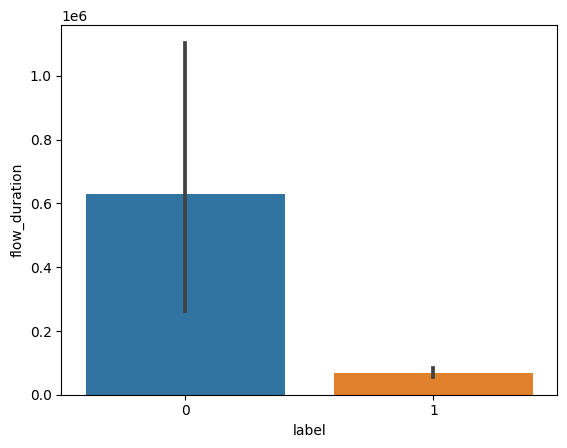

In [39]:
sns.barplot(data = data,x='label',y='flow_duration')


<h1  style="color:red;">model building</h1>

<h3>train test split</h3><br>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=25)

<h3>model intialization</h3><br>

In [46]:
model = Sequential()

In [48]:
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# 2nd Convolutional Layer
model.add(Conv1D(filters=96, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output of the previous layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\nikil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h3>model training</h3><br>

In [66]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9999 - loss: 1.2520e-04 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9999 - loss: 3.5345e-04 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9999 - loss: 3.2085e-04 - val_accuracy: 0.9998 - val_loss: 0.0016
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.0000 - loss: 4.6497e-05 - val_accuracy: 0.9998 - val_loss: 0.0020
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.0000 - loss: 6.8325e-05 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 1.0000 - loss: 7.1251e-05 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.0000 - loss: 1.5669e-05 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.00

In [37]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred> 0.5).astype(int)

# Display some predictions
print(y_pred[:15])

361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


<h3>hyperparameter tunning</h3><br>

Reloading Tuner from my_dir\cnn_tuning\tuner0.json
Optimal Conv1D Layer 1 Filters: 64
Optimal Conv1D Layer 1 Kernel Size: 5
Optimal Conv1D Layer 2 Filters: 96
Optimal Conv1D Layer 2 Kernel Size: 3
Optimal Dense Layer Units: 256
Optimal Dropout Rate: 0.3
Optimal Learning Rate: 0.00019601303117356097
Epoch 1/10


C:\Users\nikil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


700/700 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9932 - loss: 0.1044 - val_accuracy: 0.9997 - val_loss: 0.0034
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9998 - loss: 0.0052 - val_accuracy: 0.9997 - val_loss: 0.0025
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9996 - loss: 0.0025 - val_accuracy: 0.9997 - val_loss: 0.0015
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9998 - loss: 5.2002e-04 - val_accuracy: 0.9997 - val_loss: 0.0017
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9998 - loss: 2.5189e-04 - val_accuracy: 0.9998 - val_loss: 0.0018
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9999 - loss: 1.1375e-04 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 1.8635e-05 - val_accurac

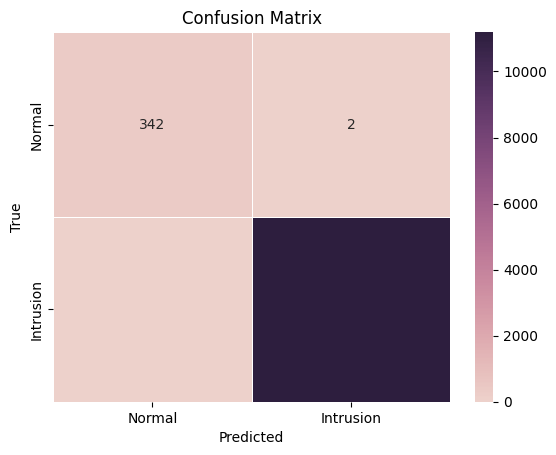

Accuracy: 0.9998


In [39]:
def build_model(hp):
    try:
        model = Sequential()

        # Tune the number of filters in the Conv1D layer
        model.add(Conv1D(filters=hp.Int('conv1d_1_filters', min_value=16, max_value=32, step=16),
                         kernel_size=hp.Choice('conv1d_1_kernel_size', values=[2, 3]),
                         activation='relu',
                         input_shape=(X_train.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=1))

        model.add(Conv1D(filters=hp.Int('conv1d_2_filters', min_value=32, max_value=64, step=32),
                         kernel_size=hp.Choice('conv1d_2_kernel_size', values=[2, 3]),
                         activation='relu'))
        model.add(MaxPooling1D(pool_size=1))

        model.add(Flatten())

        # Tune the number of units in the Dense layer
        model.add(Dense(units=hp.Int('dense_units', min_value=64, max_value=128, step=64),
                        activation='relu'))

        # Tune the dropout rate
        model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.3, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Tune the learning rate for the optimizer
        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        return model
    
    except Exception as e:
        print(f"Error during model build: {e}")
        return None

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Reduced the number of models to try
    executions_per_trial=1,  # Reduced the number of trials per model
    directory='my_dir',
    project_name='cnn_tuning')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Optimal Conv1D Layer 1 Filters: {best_hps.get('conv1d_1_filters')}")
print(f"Optimal Conv1D Layer 1 Kernel Size: {best_hps.get('conv1d_1_kernel_size')}")
print(f"Optimal Conv1D Layer 2 Filters: {best_hps.get('conv1d_2_filters')}")
print(f"Optimal Conv1D Layer 2 Kernel Size: {best_hps.get('conv1d_2_kernel_size')}")
print(f"Optimal Dense Layer Units: {best_hps.get('dense_units')}")
print(f"Optimal Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Optimal Learning Rate: {best_hps.get('learning_rate')}")

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, linewidth=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=['Normal', 'Intrusion'], yticklabels=['Normal', 'Intrusion'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


<h1   style="color:red;"> evaluvation and result</h1>

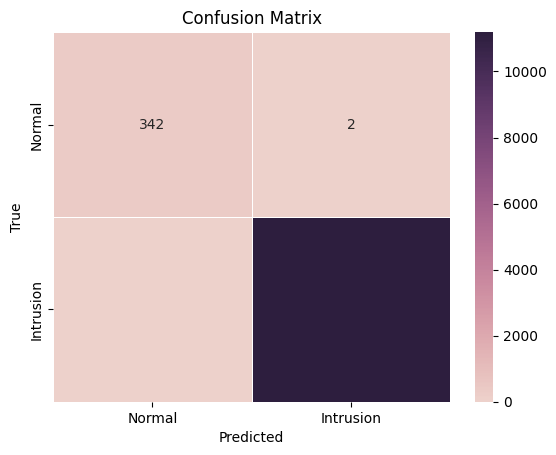

accuracy  score --> 0.999826614651062
 roundoff value of accuracy  err 
Accuracy: 0.9998
---------------------------------------------------------------------------------------------------------
R2 Score --> 0.9940073314727574
 roundoff value of r2 score
R2 SCORE--> 0.9940
------------------------------------------------------------------------------------------------------------------
Mean Squared Error --> 0.00017338534893801473
 roundoff value of mse err
 MSE ERROR--> 0.0002
---------------------------------------------------------------------------------------------------------------------------
Root Mean Squared Error --> 0.01316758705830399
 roundoff value of rmse err 
RMSE SCORE--> 0.0132
------------------------------------------------------------------------------------------------------------------
roc_auc score --> 0.997093023255814
 roundoff value of roc_auc err 
ROC-AUC: 0.9971
------------------------------------------------------------------------------------------------

In [106]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, linewidth=.5,fmt='d',cmap=sns.cubehelix_palette(as_cmap=True) , xticklabels=['Normal', 'Intrusion'], yticklabels=['Normal', 'Intrusion'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("accuracy  score -->",accuracy)
print(" roundoff value of accuracy  err ")
print(f'Accuracy: {accuracy:.4f}')
print("---"*35)

# r2score
r2=r2_score(y_test,y_pred)
print("R2 Score -->",r2)
print(" roundoff value of r2 score")
print(f'R2 SCORE--> {r2:.4f}')
print("---"*38)

#mse
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error -->",mse)
print(" roundoff value of mse err")
print(f' MSE ERROR--> {mse:.4f}')
print("---"*41)

# Rmse
rmse = np.sqrt(mse)
print("Root Mean Squared Error -->",rmse)
print(" roundoff value of rmse err ")
print(f'RMSE SCORE--> {rmse:.4f}')
print("---"*38)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("roc_auc score -->",roc_auc)
print(" roundoff value of roc_auc err ")
print(f'ROC-AUC: {roc_auc:.4f}')
print("---"*35)


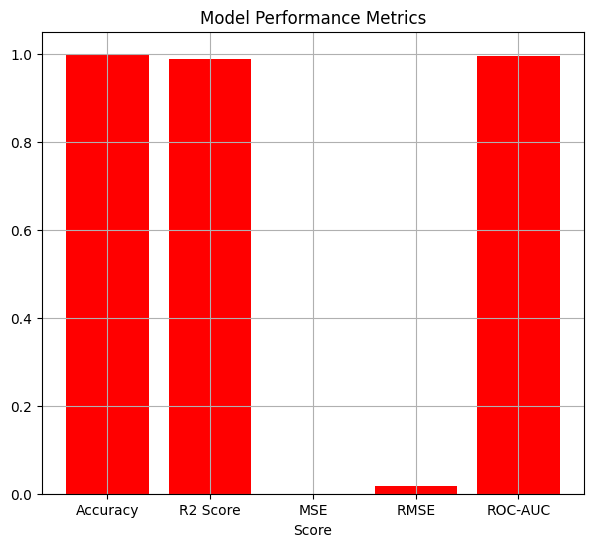

In [96]:

# Plotting the metrics
metrics = ['Accuracy', 'R2 Score', 'MSE', 'RMSE', 'ROC-AUC']
values = [accuracy, r2, mse, rmse, roc_auc]

plt.figure(figsize=(7, 6))
plt.bar(metrics, values, color='red')
plt.xlabel('Score')
plt.title('Model Performance Metrics')
plt.grid(True)
plt.show()